In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [130]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [131]:
data= pd.read_csv('data_hw5.csv')

In [132]:
data

,Test,Propellant age (Weeks),Storage temperature (oC),Pass/fail for application
0,1,15.50,40.00,fail
1,2,23.75,23.25,fail
2,3,8.00,17.00,pass
3,4,17.00,21.00,fail
4,5,5.50,10.00,pass
5,6,19.00,12.00,pass
6,7,24.00,20.00,fail
7,8,2.50,12.00,pass
8,9,7.50,15.00,pass
9,10,11.00,26.00,fail


In [133]:
X_train=data[['Propellant age (Weeks) ','Storage temperature (oC) ']]
y_train=data['Pass/fail for application ']

In [134]:
X_train=np.array(X_train)
y_train=np.array(y_train)


In [135]:
print(X_train.shape)
print(y_train.shape)

(10, 2)
(10,)


In [136]:
type(X_train)

numpy.ndarray

In [137]:
#  conversion to numerals
y_train = np.vectorize(lambda x: 1 if x == 'pass ' else 0)(y_train)

In [138]:
y_train

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [139]:
X_train

array([[15.5 , 40.  ],
       [23.75, 23.25],
       [ 8.  , 17.  ],
       [17.  , 21.  ],
       [ 5.5 , 10.  ],
       [19.  , 12.  ],
       [24.  , 20.  ],
       [ 2.5 , 12.  ],
       [ 7.5 , 15.  ],
       [11.  , 26.  ]])

Scatter Plot of data

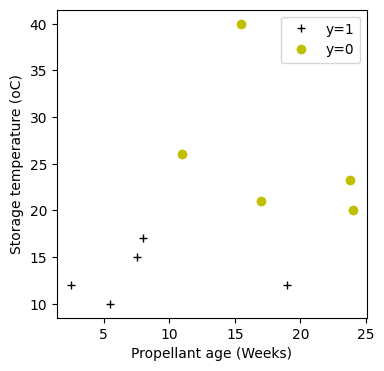

In [140]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

pos_label="y=1"
neg_label="y=0"
positive = y_train == 1
negative = y_train == 0

plt.plot(X_train[positive, 0], X_train[positive, 1], 'k+', label = "y=1")
plt.plot(X_train[negative, 0], X_train[negative, 1], 'yo', label= "y=0")

ax.set_ylabel('Storage temperature (oC)')
ax.set_xlabel('Propellant age (Weeks)')
plt.legend(loc="upper right")
plt.show()

Part 1: Cost Function and gradient

In [141]:

def compute_cost(X, y, w, b, *argv):

    m, n = X.shape

    total_cost=0.0
    for i in range(m):
        z= np.dot(w,X[i])+b
        f= sigmoid(z)
        loss=-1*y[i]*np.log(f)-(1-y[i])*np.log(1-f)
        total_cost+=loss
    total_cost/=m

    return total_cost

In [142]:

def compute_gradient(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f= sigmoid(np.dot(w, X[i])+b)
        err=f-y[i]
        dj_db+=err

        dj_dw = dj_dw + err * X[i]
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


Part 2: Gradient descent

Here, line search method that we are going to use is "Gradient Descent Algorithm".


In [143]:
# Line search method: Gradient Descent Algorithm
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db


        if i<100000:
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)   # Append cost and w_in to their respective lists
            w_history.append(w_in)




        # Calculate the interval for printing the cost
        print_interval = max(num_iters // 10, 1)

        # Print cost every 10 times or at the last iteration
        if (i % print_interval == 0) or (i == num_iters - 1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

# Convert J_history and w_history to NumPy arrays
    J_history = np.array(J_history)
    w_history = np.array(w_history)

    return w_in, b_in, J_history, w_history

Part 4:  Scatter of data, and probability (of passing or failing) contour

In [144]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
iterations = 100000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.37
Iteration 10000: Cost     0.22
Iteration 20000: Cost     0.12
Iteration 30000: Cost     0.08
Iteration 40000: Cost     0.06
Iteration 50000: Cost     0.05
Iteration 60000: Cost     0.04
Iteration 70000: Cost     0.04
Iteration 80000: Cost     0.03
Iteration 90000: Cost     0.03
Iteration 99999: Cost     0.03


In [145]:
w

array([-0.27235151, -0.64807656])

In [146]:
b

15.669243585993769

Text(0.5, 1.0, 'Probability (of passing or failing) contour')

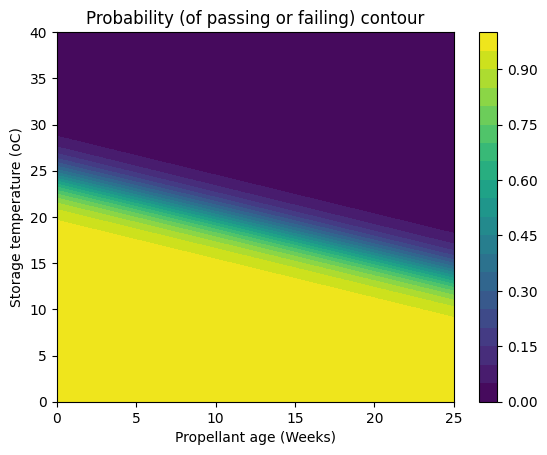

In [147]:
# Create a grid of points over the input space
x1 = np.linspace(0, 25, 100)
x2 = np.linspace(0, 40, 100)
X1, X2 = np.meshgrid(x1, x2)
grid = np.c_[X1.ravel(), X2.ravel()]

# Calculate probabilities for each point on the grid using the logistic function
probabilities = sigmoid(np.dot(grid, w) + b).reshape(X1.shape)

# Create a contour plot
plt.contourf(X1, X2, probabilities,levels=20,  cmap='viridis')
plt.colorbar()
plt.xlabel("Propellant age (Weeks)")
plt.ylabel("Storage temperature (oC)")
plt.title("Probability (of passing or failing) contour")





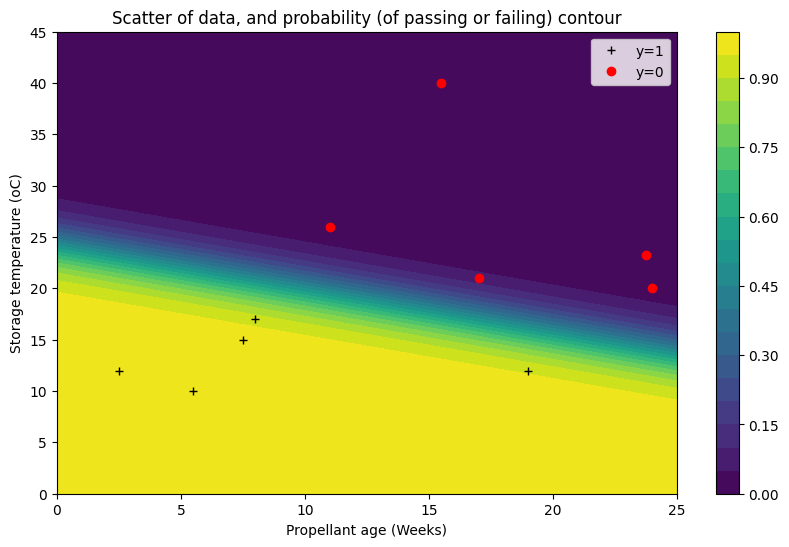

In [148]:

# Create a grid of points over the input space
x1 = np.linspace(0, 25, 100)
x2 = np.linspace(0, 45, 100)
X1, X2 = np.meshgrid(x1, x2)
grid = np.c_[X1.ravel(), X2.ravel()]

# Calculate probabilities for each point on the grid using the logistic function
probabilities = sigmoid(np.dot(grid, w) + b).reshape(X1.shape)

# Create a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, probabilities, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel("Propellant age (Weeks)")
plt.ylabel("Storage temperature (oC)")

# Overlay the given data on the same plot
pos_label = "y=1"
neg_label = "y=0"
positive = y_train == 1
negative = y_train == 0

# Plot data
plt.plot(X_train[positive, 0], X_train[positive, 1], 'k+', label=pos_label)
plt.plot(X_train[negative, 0], X_train[negative, 1], 'ro', label=neg_label)

plt.legend(loc="upper right")
plt.title('Scatter of data, and probability (of passing or failing) contour')
plt.savefig('Scatter of data, and probability (of passing or failing) contour')
plt.show()

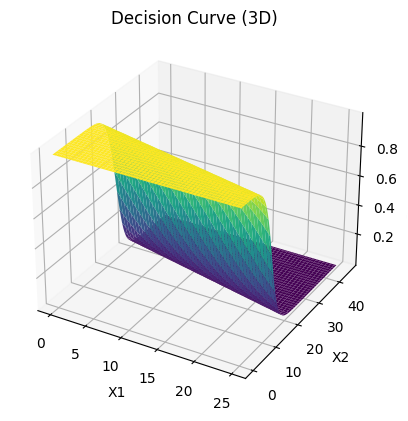

In [149]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, probabilities, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability')
plt.title('Decision Curve (3D)')
plt.savefig('3D Decision curve.png')
plt.show()